# 3-Sigma Technique (Standard Deviation)

In [45]:
# Basic Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
data = pd.read_csv('../Data/raw_sales.csv')

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
type(data)

pandas.core.frame.DataFrame

In [14]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [20]:
data['price']

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [16]:
list_1 = find_anomalies(data['price'])

In [19]:
print(f"There are {len(list_1)} outliers present in our data")

There are 461 missing values.


In [23]:
print(f"There are {len(data)} length of data.")

There are 29580 length of data.


<hr>
**Calculation:**
    (461/29580)*100 = 1.55%

- Therfore our data is beyound the range of 3𝞂 ( + or - sigma)
- It's not Normally Distributed (ideal: 0.3%) 

<hr>

### Understanding Skewness


**Skewness** is a statistical measure that describes the <span style="color:red">asymmetry</span> of the distribution of values in a dataset. It indicates whether the data points are skewed to the left (<span style="color:red">negative skew</span>) or the right (<span style="color:red">positive skew</span>) relative to the mean. <span style="color:red">Skewness</span> helps understand the underlying distribution of data, which is crucial for <span style="color:red">decision-making</span>, <span style="color:red">risk assessment</span>, and <span style="color:red">predicting future trends</span>.
<br>

In [25]:
data['price'].skew()

4.312009366902366

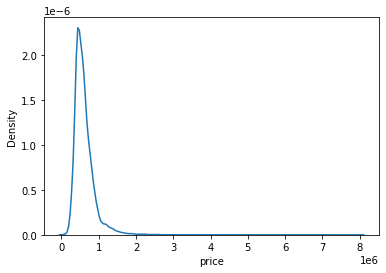

In [27]:
# Visualizing Skewness

sns.kdeplot(data['price']);

In [28]:
# Some transformation to make it ideal 

data['price_transformed'] = np.log(data.price)

In [29]:
data.price_transformed.skew()

0.4731646269984763

In [30]:
list_2 = find_anomalies(data['price_transformed'])

In [32]:
print(f"There are {len(list_2)} outlier present in our data.")

There are 266 length of data.


In [33]:
print(f"There are {len(data)} length of data.")

There are 29580 length of data.


<hr>
**Calculation:**
    (266/29580)*100 = 0.9%

- Therfore our data is beyound the range of 3𝞂 ( + or - sigma)
- It's comming **close to the Normal Distribution** (ideal: 0.3%) 

<hr>


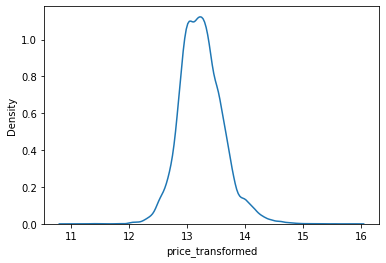

In [35]:
sns.kdeplot(data['price_transformed']);

In [36]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [37]:
data['price_transformed_double'].skew()

0.33092530655758573

In [38]:
list_3 = find_anomalies(data.price_transformed_double)

In [39]:
print(f"There are {len(list_3)} outliers in data.")

There are 251 length of data.


In [40]:
print(f"There are {len(data)} length of data.")

There are 29580 length of data.


<hr>
**Calculation:**
    (251/29580)*100 = 0.84%

- Therfore our data is beyound the range of 3𝞂 ( + or - sigma)
- It's comming **close to the Normal Distribution** (ideal: 0.3%) 

<hr>

## Boxplot

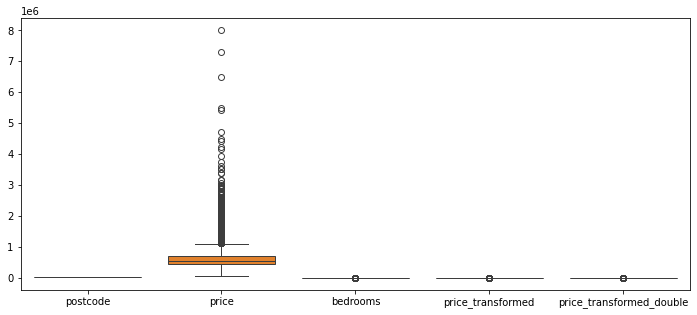

In [55]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=data);

- As you can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.

In [58]:
df = pd.DataFrame(data)

In [61]:
df.head()

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209


In [59]:
print(f"There are {len(df)} length of data.")

There are 29580 length of data.


In [62]:
# Statistical information of the dataframe columns

df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


## Inter Quartile Range (IQR = Q3 - Q1)

In [63]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [64]:
print(f"There are {len(list1)} length of data.")

There are 25 length of data.


In [65]:
max(list1)

99

In [66]:
min(list1)

43

In [67]:
statistics.mean(list1)

76.96

In [69]:
print(sorted(list1))

[43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]
